# Import Libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import json
import random
from PIL import Image
import matplotlib.pyplot as plt

from DatasetInterface import MSCOCOInterface


In [2]:
###### SUGGESTED CHANGE OF DIRECTORY STRUCTURE
# Github page for COCO API suggests puting data into coco/images and coco/annotations, so could do that?
# The API is pretty straightforward and helps with visualisation etc
######
#root = Path('Datasets/coco')
root = Path('../../Datasets/MS COCO')
#imgs_path = root/'images'/'train2017'
imgs_path = root/'train2017'
#captions_path = root/'annotations'/'captions_train2017.json'
captions_path = root/'annotations_trainval2017'/'annotations'/'captions_train2017.json'

# load vocab

with open('idx_to_string.json') as json_file:
    idx_to_string_json = json.load(json_file)
        
idx_to_string = dict()
for key in idx_to_string_json:
    idx_to_string[int(key)] = idx_to_string_json[key]
    
with open('string_to_index.json') as json_file:
    string_to_index = json.load(json_file)

interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index
}

In [3]:
coco_interface = MSCOCOInterface(**interface_params)

In [4]:
len(coco_interface.string_to_index)

26845

In [5]:
len(coco_interface.idx_to_string)

26845

In [6]:
caption_dict = coco_interface.coco.imgs_caps_dict

13 a
84 sun
458 setting
631 over
13 a
637 beach
1502 town
26 with
301 light
711 traffic
0 <PAD>
0 <PAD>
0 <PAD>
0 <PAD>
0 <PAD>
0 <PAD>
0 <PAD>
0 <PAD>
0 <PAD>
0 <PAD>


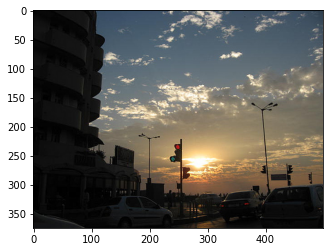

A sun setting over a beach town with light traffic.


In [7]:
random_idx = random.randint(0, len(coco_interface.coco.imgs))
idx, X, y = coco_interface[random_idx]
for cap in y:
    print(cap, coco_interface.idx_to_string[cap])
plt.imshow(coco_interface.coco.get_img(random_idx))
plt.show()

img_file_name = coco_interface.coco.imgs[idx]
print(coco_interface.get_captions(img_file_name)[0])

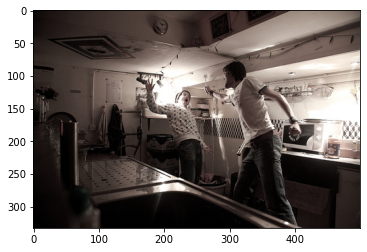

In [20]:
random_idx = random.randint(0, len(coco_interface.coco.imgs))
img_file_name = coco_interface.coco.imgs[random_idx]
# get X: Image
X = coco_interface.load_img(random_idx)
# get y: Image Caption
y = coco_interface.get_captions(img_file_name)[0]
y_idx = coco_interface.vocabulary.numericalize(y)

plt.imshow(coco_interface.coco.get_img(random_idx))
plt.show()

In [21]:
y

'Two young men pretending to joust in a kitchen.'

In [15]:
for ind in y_idx:
    print(coco_interface.idx_to_string[ind])

small
white
dog
baseball
cap
sitting
